In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from matplotlib import rc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import learning_curve, KFold

In [42]:
#1. Download the two different datasets (for white and red wines): 
#https://archive.ics.uci.edu/ml/datasets/Wine+Quality.

#2. Create a new column for the type of wine (eg. 1 for red and 0 for white). 
#3. Fuse them into one dataset (hint: Use pandas).
#4. Split dataset into training and test parts 
#(hint: Use `train_test_split` from Scikit-Learn, it works directly 

In [ ]:

columns = ["facidity", "vacidity", "citric", "sugar", "chlorides", "fsulfur", 
               "tsulfur", "density", "pH", "sulphates", "alcohol", "quality"]
red=pd.read_csv("~/Downloads/winequality-red.csv",names=columns,sep=";", skiprows=1)
white=pd.read_csv("~/Desktop/winequality-white.csv",names=columns,sep=";", skiprows=1)

In [39]:
red.head()

,facidity,vacidity,citric,sugar,chlorides,fsulfur,tsulfur,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
#2. Created a new column for the type of wine (eg. 1 for red and 0 for white). 
#3. Fuse them into one dataset (hint: Use pandas)

In [36]:
 red["color"] = 1
 white["color"] = 0
 wines = pd.concat([white, red])

In [37]:
wines.head()

,facidity,vacidity,citric,sugar,chlorides,fsulfur,tsulfur,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
#A) Use regression to predict the alcohol level of the wine on a test set.
#B) Use binary classification to predict the type of wine on a test set.
#C) Use multiclass classification to predict the quality of the wine on a test set.

In [10]:
X = wines.iloc[:,:13].values
y_quality = wines.iloc[:,11].values
y_type = wines.iloc[:,12].values
y_level = wines.iloc[:,10].values

In [11]:
#A) Use regression to predict the alcohol level of the wine on a test set.

In [12]:
X_level = wines.loc[:,wines.columns !="alcohol"].values


In [13]:
X_level

array([[7.   , 0.27 , 0.36 , ..., 0.45 , 6.   , 0.   ],
       [6.3  , 0.3  , 0.34 , ..., 0.49 , 6.   , 0.   ],
       [8.1  , 0.28 , 0.4  , ..., 0.44 , 6.   , 0.   ],
       ...,
       [6.3  , 0.51 , 0.13 , ..., 0.75 , 6.   , 1.   ],
       [5.9  , 0.645, 0.12 , ..., 0.71 , 5.   , 1.   ],
       [6.   , 0.31 , 0.47 , ..., 0.66 , 6.   , 1.   ]])

In [14]:
y_level = wines.iloc[:,10].values

In [15]:
y_level.reshape(-1,1)

array([[ 8.8],
       [ 9.5],
       [10.1],
       ...,
       [11. ],
       [10.2],
       [11. ]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_level, y_level, random_state=42)
lr = LinearRegression().fit(X_train, y_train)


In [17]:
X_train.shape,y_train.shape,X_test.shape

((4872, 12), (4872,), (1625, 12))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_level, y_level, random_state=42)
lr = LinearRegression().fit(X_train, y_train)


Training set score: 0.82
Test set score: 0.85


In [ ]:
#Training set score: 0.82
#Test set score: 0.85

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.43
Test set score: 0.44


In [ ]:
#Training set score: 0.43
#Test set score: 0.44

In [20]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.41
Test set score: 0.42


In [ ]:
#Training set score: 0.41
#Test set score: 0.42

In [21]:
ridge01 = Ridge(alpha=.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.69


In [44]:
#Training set score: 0.67
#Test set score: 0.69

In [22]:
ridge001 = Ridge(alpha=.001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.84


In [45]:
#Training set score: 0.81
#Test set score: 0.84

In [23]:
ridge0001 = Ridge(alpha=.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge0001.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.85


In [46]:
#Training set score: 0.82
#Test set score: 0.85

In [24]:
ridge00001 = Ridge(alpha=.00001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge00001.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.85


In [47]:
#Training set score: 0.82
#Test set score: 0.85

In [25]:
def plot_ridge():
    plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
    plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
    plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.01")
    plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.001")
    plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.0001")
    plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.00001")
    plt.plot(lr.coef_, 'o', label="LinearRegression")
    plt.xticks(range(len(columns)-1), columns, rotation=90)
    plt.hlines(0, 0, range(len(columns)-1))
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.hlines(0, 0, len(lr.coef_))
    plt.ylim(-45, 45)
    plt.legend()

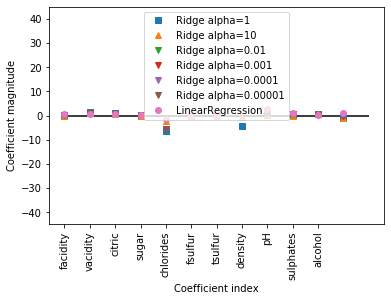

In [26]:
plot_ridge()

In [27]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import learning_curve, KFold


def plot_learning_curve(est, X, y_level):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y_level, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)


def plot_ridge_n_samples(X,y,alpha=1):
    plot_learning_curve(Ridge(alpha=alpha), X,y_level)
    plot_learning_curve(LinearRegression(), X, y_level)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=18)

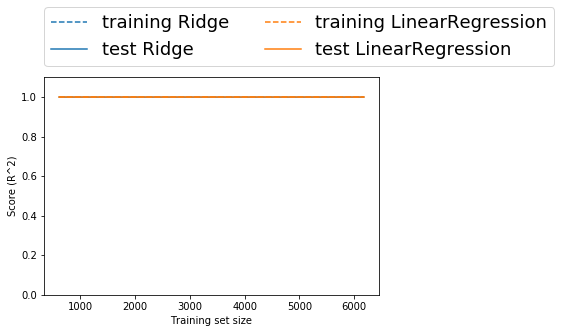

In [28]:
plot_ridge_n_samples(X,y_level,alpha=1)

In [29]:
from sklearn.linear_model import Lasso
X_level = wines.loc[:,wines.columns !="alcohol"].values
y_level = wines.iloc[:,10].values
X_train, X_test, y_train, y_test = train_test_split(X_level, y_level, random_state=42)
lasso = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.10
Test set score: 0.10
Number of features used: 2


In [48]:
#Training set score: 0.10
#Test set score: 0.10
#Number of features used: 2


In [30]:
lasso01 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.37
Test set score: 0.39


NameError: name 'lasso001' is not defined

In [49]:
#Training set score: 0.37
#Test set score: 0.39

In [50]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.42
Test set score: 0.44
Number of features used: 11


In [ ]:
#Training set score: 0.42
#Test set score: 0.44
#Number of features used: 11

In [51]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.81
Test set score: 0.84
Number of features used: 11


In [52]:
#Training set score: 0.81
#Test set score: 0.84
#Number of features used: 11

In [53]:
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.82
Test set score: 0.85
Number of features used: 12


In [54]:
#Training set score: 0.82
#Test set score: 0.85
#Number of features used: 12

In [ ]:
def plot_lasso_vs_ridge():
    names= ["facidity","acidity","citric","sugar""chlorides","fsulfur","tsulfur","density","pH","sulphates","alcohol","quality","color"]
    plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
    plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
    plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.001")
    plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.0001")
    plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
    plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
    plt.xticks(range(len(names)-1), names, rotation=90)
    plt.hlines(0, 0, range(len(names)-1))
    plt.legend(ncol=2, loc=(0, 1.05))
    plt.ylim(-25, 25)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")

In [ ]:
plot_lasso_vs_ridge()

In [ ]:
#B) Use binary classification to predict the type of wine on a test set.

In [ ]:
wines.head()

In [56]:
X_bin = wines.iloc[:,:12].values
y_bin = wines.iloc[:,12].values


In [57]:
y_bin

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
X_bin

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.983
Test set score: 0.977


C:\Users\shohidul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
#Training set score: 0.983
#Test set score: 0.977

In [60]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.989
Test set score: 0.986


C:\Users\shohidul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
#Training set score: 0.989
#Test set score: 0.986

In [61]:
logreg1 = LogisticRegression(C=0.1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(X_test, y_test)))

Training set score: 0.971
Test set score: 0.964


C:\Users\shohidul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
#Training set score: 0.971
#Test set score: 0.964

In [63]:
logreg01 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test, y_test)))

Training set score: 0.950
Test set score: 0.948


C:\Users\shohidul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
#Training set score: 0.950
#Test set score: 0.948

In [65]:
logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.943
Test set score: 0.933


C:\Users\shohidul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
#Training set score: 0.943
#Test set score: 0.933

In [ ]:
new_names = ["facidity","acidity","citric","sugar""chlorides","fsulfur","tsulfur","density","pH","sulphates","alcohol","quality","color"]

# Logistic Regression with L2 regularization

def plot_lg_l2():
    plt.plot(logreg.coef_.T, 'o', label="C=1")
    plt.plot(logreg100.coef_.T, '^', label="C=100")
    plt.plot(logreg1.coef_.T, 'v', label="C=0.1")
    plt.plot(logreg01.coef_.T, 'v', label="C=0.01")
    plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
    plt.xticks(range(len(new_names)), new_names, rotation=90)
    plt.hlines(0, 0, range(len(new_names)))
    plt.ylim(-5, 5)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.legend()

In [ ]:
plot_lg_l2()

In [ ]:
def plot_lg_l1():
    for C, marker in zip([0.001,0.01,.1, 1, 100], ['o', '^', 'v','o', '^']):
        lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
        #print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            #C, lr_l1.score(X_train, y_train)))
        #print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            #C, lr_l1.score(X_test, y_test)))
        plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    plt.xticks(range(len(new_names)), new_names, rotation=90)
    plt.hlines(0, 0, range(len(new_names)))
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)

In [ ]:
plot_lg_l1()

In [ ]:
#C) Use multiclass classification to predict the quality of the wine on a test set.

In [ ]:
wines.head()

In [67]:
X_mul = wines.loc[:,wines.columns !="quality"].values
y_mul = wines.iloc[:,11].values

In [68]:
y_mul

array([6, 6, 6, ..., 6, 5, 6], dtype=int64)

In [69]:
X_mul

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  0.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  0.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  0.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  1.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  1.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  1.   ]])

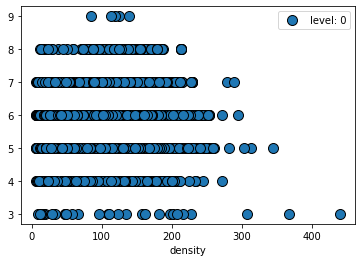

In [70]:
features= ["facidity","acidity","citric","sugar""chlorides","fsulfur","tsulfur","density","pH","sulphates","alcohol","quality","color"]
n,m = 6,7
mglearn.discrete_scatter(X_mul[:, n],y_mul)
plt.xlabel(features[n])
plt.legend(["level: 0", "level: 1"])

In [71]:
#Naive-Bayes Classifiers

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_mul,y_mul).predict(X_mul)

print("Number of mislabeled points out of a total {} points : {}".format(X_mul.shape[0],(y_mul != y_pred).sum()))

Number of mislabeled points out of a total 6497 points : 3885


In [73]:
#Number of mislabeled points out of a total 6497 points : 3885


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_mul, y_mul, random_state=42)
gnb_fit = gnb.fit(X_train, y_train)
print("Training set score: {:.3f}".format(gnb_fit.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gnb_fit.score(X_test, y_test)))

Training set score: 0.402
Test set score: 0.395


In [75]:
#Training set score: 0.402
#Test set score: 0.395

In [76]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.985


In [77]:
#Accuracy on training set: 1.000
#Accuracy on test set: 0.985

In [78]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["red", "white"],
feature_names=new_names, impurity=False, filled=True)

NameError: name 'new_names' is not defined

In [ ]:
# Note: you should install graphviz in your system. 
#! pip install graphviz
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

In [ ]:
def plot_feature_importances(model):
    n_features = X_bin.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), new_names)
    plt.title('Feature importance for wine dataset')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [ ]:
plot_feature_importances(tree)

In [ ]:
#Ensembles of Decision Trees

In [79]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_mul,y_mul, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.687


In [80]:
#Accuracy on training set: 1.000
#Accuracy on test set: 0.687

In [ ]:
# Feature Importance for Random Forest
plot_feature_importances(forest)

In [ ]:
#Gradient boosted regression trees 

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_mul,y_mul, random_state=42)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.714
Accuracy on test set: 0.583


In [ ]:
#Accuracy on training set: 0.714
#Accuracy on test set: 0.583

In [82]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.563
Accuracy on test set: 0.561


In [83]:
#Accuracy on training set: 0.563
#Accuracy on test set: 0.561

In [84]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.561
Accuracy on test set: 0.551


In [85]:
#Accuracy on training set: 0.561
#Accuracy on test set: 0.551

In [86]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances(gbrt)

NameError: name 'plot_feature_importances' is not defined

In [ ]:
#Kernelized Support Vector Machines

In [ ]:
from sklearn.datasets import make_blobs
plt.rcParams['lines.markersize'] = 25.0


X_level, y_level = make_blobs(centers=4, random_state=8)
y_level = y_level % 2
mglearn.discrete_scatter(X_level[:, 0], X_level[:, 1], y_level)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
from sklearn.svm import LinearSVC

def plot_lin_svm():
    linear_svm = LinearSVC().fit(X_level, y_level)
    mglearn.plots.plot_2d_separator(linear_svm, X_level)
    mglearn.discrete_scatter(X_level[:, 0], X_level[:, 1], y_level)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

In [ ]:
plot_lin_svm()